## Лабораторная работа № 3. Простой анализ данных
### (Валяев Георгий, ПИ20-6)

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Основные задания для выполнения

##### 1. Загрузите данные в ноутбук.

In [2]:
dataframe_grades = pd.read_excel('data/Вариант 1.xlsx', header=2, skipfooter=1)
dataframe_grades

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,117,11,М,341,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8,20,24
1,2,148,12А,М,338,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8,20,24
2,3,152,13,Ж,104,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9,22,24
3,4,152,13,М,104,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9,22,24
4,5,132,11,М,337,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10,24,24
...,...,...,...,...,...,...,...,...,...,...,...
3043,3044,146,11,Ж,338,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58,100,24
3044,3045,147,11,Ж,340,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58,100,24
3045,3046,147,11,Ж,338,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58,100,24
3046,3047,147,11,Ж,337,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58,100,24


##### 2. Сделайте описательную статистику по набранному баллу.

In [3]:
stats = dataframe_grades['Балл'].describe()
print("Описательная статистика выборки баллов ЕГЭ:\n1) Количество сдающих экзамен =", stats[0])
print(f"2) Средний балл = {stats[1]}\n3) Стандартное отклонение баллов = {stats[2]}\n4) Минимальный балл = {stats[3]}")
print(f"5) 1 квартиль баллов = {stats[4]}\n6) 2 квартиль (медиана) баллов = {stats[5]}\n7) 3 квартиль баллов = {stats[6]}")
print(f"8) Максимальный балл = {stats[7]}.")

Описательная статистика выборки баллов ЕГЭ:
1) Количество сдающих экзамен = 3048.0
2) Средний балл = 72.76902887139107
3) Стандартное отклонение баллов = 13.664907615481058
4) Минимальный балл = 20.0
5) 1 квартиль баллов = 64.0
6) 2 квартиль (медиана) баллов = 72.0
7) 3 квартиль баллов = 82.0
8) Максимальный балл = 100.0.


##### 3. Найдите процент учащихся, выполнивших работу ниже среднего.

In [4]:
res_down_mean = round(((dataframe_grades['Балл'] < dataframe_grades['Балл'].mean()).sum() / len(dataframe_grades)) * 100, 4)
print('Среди всех выполнивших работу учащихся ниже среднего сделало: ', end='')
print(res_down_mean, '%', sep='')

Среди всех выполнивших работу учащихся ниже среднего сделало: 51.2795%


##### 4. Найти процент учащихся, не сдавших экзамен.

In [14]:
res_not_passed = round(((dataframe_grades['Балл'] < dataframe_grades['Минимальный балл']).sum() / len(dataframe_grades)) * 100, 4)
print('Среди всех учащихся не сдавало: ', end='')
print(res_not_passed, '%', sep='')

Среди всех учащихся не сдавало: 0.1312%


##### 5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

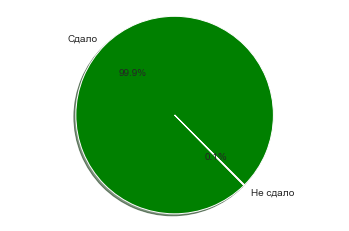

In [6]:
values = [100 - res_not_passed, res_not_passed]
fig, ax = plt.subplots()
ax.pie(values, labels=['Сдало', 'Не сдало'], autopct='%1.1f%%', shadow=True, startangle=-45, colors=['green', 'red'])
ax.axis('equal')
plt.show()

##### 6. Постройте ядерную оценку плотности распределению баллов за экзамен.

<AxesSubplot:xlabel='Балл', ylabel='Density'>

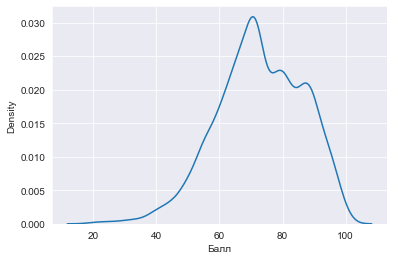

In [7]:
sns.kdeplot(x=dataframe_grades['Балл'], ax=plt.subplots()[1])

##### 7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [18]:
def percent_grade(low, high):
    maska = (dataframe_grades['Балл'] >= low) & (dataframe_grades['Балл'] <= high)
    return (maska.sum() / len(dataframe_grades['Балл'])) * 100

s = pd.Series()
s["неудовлетворительно"], s["удовлетворительно"] = percent_grade(0, 35), percent_grade(36, 56)
s["хорошо"], s["отлично"] = percent_grade(57, 71), percent_grade(72, 100)
s

C:\Users\admin\AppData\Local\Temp\ipykernel_15528\2479111547.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series()


неудовлетворительно     0.688976
удовлетворительно      11.548556
хорошо                 34.448819
отлично                53.313648
dtype: float64

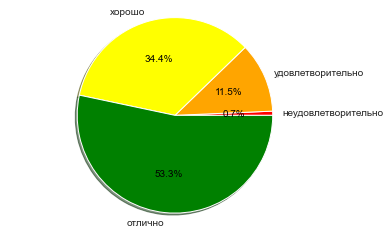

In [22]:
values = [s["неудовлетворительно"], s["удовлетворительно"], s["хорошо"], s["отлично"]]
fig, ax = plt.subplots()
_, _, autotexts = ax.pie(values, labels=['неудовлетворительно', 'удовлетворительно', 'хорошо', 'отлично'], autopct='%1.1f%%', shadow=True, colors=['red', 'orange', 'yellow', 'green'])
for autotext in autotexts:
    autotext.set_color('black')
ax.axis('equal')
plt.show()

##### 8. Какое процентное соотношение юношей и девушек писало данный экзамен?

<AxesSubplot:ylabel='Пол'>

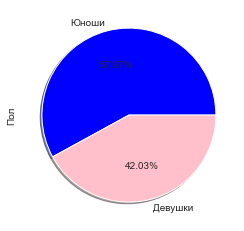

In [48]:
dataframe_grades['Пол'].value_counts().plot.pie(autopct='%1.2f%%', labels=['Юноши', 'Девушки'],shadow=True, colors=['blue', 'pink'])

In [49]:
dataframe_grades['Пол'].value_counts()

Ж    1767
М    1281
Name: Пол, dtype: int64

##### 9. Сколько школ принимало участие в экзамене?

В экзамене приняло участие 24 школ(-ы).
Вот их список: 152 148 153 147 122 146 140 137 144 126 133 117 104 111 115 141 132 112 114 128 108 130 138 1106


<AxesSubplot:ylabel='№ школы'>

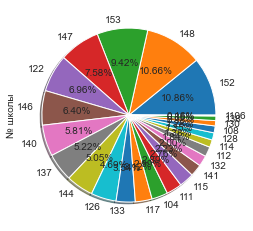

In [64]:
print(f"В экзамене приняло участие {dataframe_grades['№ школы'].value_counts().count()} школ(-ы).\nВот их список:", end=' ')
print(*list(dataframe_grades['№ школы'].value_counts().index))
dataframe_grades['№ школы'].value_counts().plot.pie(autopct='%1.2f%%', shadow=True)